In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датасета

In [3]:
data = pd.read_csv('f19_a3_in.csv')

In [4]:
data.head()

,CommonStudent,Id,BachComp_Id,OrigDate,CompOriginal,CompOrig,FreePlaces,IsBudgetPlace,IsCommercePlace,TotalSummDiv,...,Age,IsBaseSchool,HasExellence,UniOrig,Itog,YearNumber,ProgramPriorId,UniCompetId,UniPriorId,Comp_D
0,3016925002,3016925550,2640685227,NaN,False,0.0,0,1,1,0.93,...,17,False,False,0,1,2019,17.0,0.0,0.0,Иностранные языки и межкультурная коммуникация
1,1697389921,3220150202,2640662564,NaN,False,0.0,0,1,1,0.87,...,20,False,False,0,1,2019,NaN,NaN,NaN,Социология
2,1690480361,2978312800,2640685227,NaN,False,0.0,0,1,0,0.98,...,18,False,True,1,1,2019,6.0,580.0,0.0,Иностранные языки и межкультурная коммуникация
3,2667859309,2966556475,2640685227,NaN,False,0.0,0,1,0,0.90,...,18,False,True,0,1,2019,31.0,0.0,0.0,Иностранные языки и межкультурная коммуникация
4,1970227395,2905219243,2640655893,NaN,False,0.0,0,1,1,0.86,...,18,False,False,1,1,2019,17.0,0.0,0.0,Маркетинг и рыночная аналитика


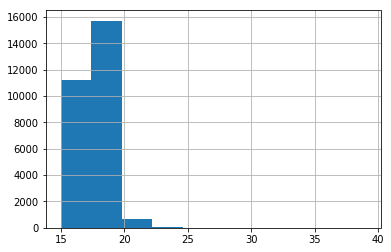

In [5]:
data['Age'].hist()

In [6]:
data.shape

(27665, 22)

### Предобработка признаков
Должны остаться только бинарные, для этого убираем числовые, возраст и сумму баллов делим на группы.

In [7]:
index = 0
l8 = np.zeros(data.shape[0])
l9 = np.zeros(data.shape[0])
l1 = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    val = data['TotalSummDiv'][i]
    if val < 0.8:
        l8[i] = 1
    else:
        if val < 0.9:
            l9[i] = 1
        else:
            l1[i] = 1

In [8]:
index = 0
l18 = np.zeros(data.shape[0])
l20 = np.zeros(data.shape[0])
m20 = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    val = data['Age'][i]
    if val < 18:
        l18[i] = 1
    else:
        if val < 20:
            l20[i] = 1
        else:
            m20[i] = 1

In [9]:
data['TotalSummDiv_l1.0'] = l1
data['TotalSummDiv_l0.8'] = l8
data['TotalSummDiv_l0.9'] = l9

data['Age < 18'] = l18
data['Age < 20'] = l20
data['Age >= 20'] = m20

In [10]:
data.head()

,CommonStudent,Id,BachComp_Id,OrigDate,CompOriginal,CompOrig,FreePlaces,IsBudgetPlace,IsCommercePlace,TotalSummDiv,...,ProgramPriorId,UniCompetId,UniPriorId,Comp_D,TotalSummDiv_l1.0,TotalSummDiv_l0.8,TotalSummDiv_l0.9,Age < 18,Age < 20,Age >= 20
0,3016925002,3016925550,2640685227,NaN,False,0.0,0,1,1,0.93,...,17.0,0.0,0.0,Иностранные языки и межкультурная коммуникация,1.0,0.0,0.0,1.0,0.0,0.0
1,1697389921,3220150202,2640662564,NaN,False,0.0,0,1,1,0.87,...,NaN,NaN,NaN,Социология,0.0,0.0,1.0,0.0,0.0,1.0
2,1690480361,2978312800,2640685227,NaN,False,0.0,0,1,0,0.98,...,6.0,580.0,0.0,Иностранные языки и межкультурная коммуникация,1.0,0.0,0.0,0.0,1.0,0.0
3,2667859309,2966556475,2640685227,NaN,False,0.0,0,1,0,0.90,...,31.0,0.0,0.0,Иностранные языки и межкультурная коммуникация,1.0,0.0,0.0,0.0,1.0,0.0
4,1970227395,2905219243,2640655893,NaN,False,0.0,0,1,1,0.86,...,17.0,0.0,0.0,Маркетинг и рыночная аналитика,0.0,0.0,1.0,0.0,1.0,0.0


In [11]:
# НЕ категориальные признаки
data = data.drop('CommonStudent', axis=1)
data = data.drop('Id', axis=1)
data = data.drop('BachComp_Id', axis=1)
data = data.drop('OrigDate', axis=1)
data = data.drop('TotalSummDiv', axis=1)
data = data.drop('OrigDateCount', axis=1)
data = data.drop('FromDateCount', axis=1)

# Тавтологии
data = data.drop('IsBudgetPlace', axis=1) # 1
data = data.drop('YearNumber', axis=1) # 2019
data = data.drop('FreePlaces', axis=1) # 1

# Test
data = data.drop('CompOrig', axis=1)
data = data.drop('Age', axis=1)
data = data.drop('UniCompetId', axis=1)
data = data.drop('UniPriorId', axis=1)
data = data.drop('Comp_D', axis=1)

In [12]:
data.head()

,CompOriginal,IsCommercePlace,IsBaseSchool,HasExellence,UniOrig,Itog,ProgramPriorId,TotalSummDiv_l1.0,TotalSummDiv_l0.8,TotalSummDiv_l0.9,Age < 18,Age < 20,Age >= 20
0,False,1,False,False,0,1,17.0,1.0,0.0,0.0,1.0,0.0,0.0
1,False,1,False,False,0,1,NaN,0.0,0.0,1.0,0.0,0.0,1.0
2,False,0,False,True,1,1,6.0,1.0,0.0,0.0,0.0,1.0,0.0
3,False,0,False,True,0,1,31.0,1.0,0.0,0.0,0.0,1.0,0.0
4,False,1,False,False,1,1,17.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
for i in data.columns:
    print(i + ': ', '\t', data[i].unique())

CompOriginal:  	 [False  True]
IsCommercePlace:  	 [1 0]
IsBaseSchool:  	 [False  True]
HasExellence:  	 [False  True]
UniOrig:  	 [0 1 3]
Itog:  	 [1 0]
ProgramPriorId:  	 [17. nan  6. 31.  4.  8.  0.  1.  7. 25. 33.  3.  2. 22. 16. 30. 23. 34.
 35. 12. 27. 21. 24. 10. 18.  9. 11. 15. 14. 26.  5. 29. 20. 13. 32.]
TotalSummDiv_l1.0:  	 [1. 0.]
TotalSummDiv_l0.8:  	 [0. 1.]
TotalSummDiv_l0.9:  	 [0. 1.]
Age < 18:  	 [1. 0.]
Age < 20:  	 [0. 1.]
Age >= 20:  	 [0. 1.]


In [15]:
df = pd.get_dummies(data, columns=['ProgramPriorId'], dummy_na=True)# 'CompOrig', 'Age', 'Comp_D'

In [16]:
df.shape

(27665, 47)

In [17]:
df = df.astype('float64')

In [18]:
df.head()

,CompOriginal,IsCommercePlace,IsBaseSchool,HasExellence,UniOrig,Itog,TotalSummDiv_l1.0,TotalSummDiv_l0.8,TotalSummDiv_l0.9,Age < 18,...,ProgramPriorId_26.0,ProgramPriorId_27.0,ProgramPriorId_29.0,ProgramPriorId_30.0,ProgramPriorId_31.0,ProgramPriorId_32.0,ProgramPriorId_33.0,ProgramPriorId_34.0,ProgramPriorId_35.0,ProgramPriorId_nan
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from tqdm import tqdm
cols = df.columns
N = len(cols)
dfNew = ''
for index, rows in tqdm(df.iterrows()): 
    for i in range(N):
        if rows[i] == 1.:
            dfNew += cols[i] + ','
    dfNew = dfNew[:-1] + '\n'

27665it [00:15, 1835.72it/s]


In [20]:
with open('list-3.csv', 'w+') as f:
    f.write(dfNew[:-1])

In [21]:
def load_transactions(fname):
    file_iter = open(fname, 'rU')
    for line in file_iter:
        line = line.strip().rstrip(',')
        record = list(line.split(','))
        yield record

In [22]:
import apriori

transactions = list(load_transactions('list-3.csv'))
result = list(apriori.apriori(transactions, min_support = 0.01, min_confidence = 0.7, min_lift = 1.5))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [373]:
import shutil, os 
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import json #преобразовывать будем в json, используя встроенные в модуль методы
output = []
for RelationRecord in result:
    o = StringIO()
    apriori.dump_as_json(RelationRecord, o)
    output.append(json.loads(o.getvalue()))
data_df = pd.DataFrame(output)
# и взгялнем на итоги
pd.set_option('display.max_colwidth', -1)

from IPython.display import display, HTML

display(HTML(data_df.to_html()))

,items,ordered_statistics,support
0,"[CompOriginal, IsCommercePlace, ProgramPriorId_4.0]","[{'items_base': ['CompOriginal', 'ProgramPriorId_4.0'], 'items_add': ['IsCommercePlace'], 'confidence': 0.8959537572254335, 'lift': 1.5437568942228213}]",0.011205
1,"[CompOriginal, IsCommercePlace, TotalSummDiv_l0.8]","[{'items_base': ['CompOriginal', 'TotalSummDiv_l0.8'], 'items_add': ['IsCommercePlace'], 'confidence': 0.8984198645598194, 'lift': 1.5480060758001621}]",0.014386
2,"[CompOriginal, IsCommercePlace, TotalSummDiv_l0.9]","[{'items_base': ['CompOriginal', 'TotalSummDiv_l0.9'], 'items_add': ['IsCommercePlace'], 'confidence': 0.948467966573816, 'lift': 1.634240551523706}]",0.049232
3,"[HasExellence, ProgramPriorId_17.0, TotalSummDiv_l1.0]","[{'items_base': ['ProgramPriorId_17.0', 'TotalSummDiv_l1.0'], 'items_add': ['HasExellence'], 'confidence': 0.7317073170731706, 'lift': 1.6565206977765357}]",0.018435
4,"[HasExellence, ProgramPriorId_21.0, TotalSummDiv_l1.0]","[{'items_base': ['HasExellence', 'ProgramPriorId_21.0'], 'items_add': ['TotalSummDiv_l1.0'], 'confidence': 0.8827433628318584, 'lift': 1.6481808147899955}]",0.014423
5,"[HasExellence, ProgramPriorId_33.0, TotalSummDiv_l1.0]","[{'items_base': ['ProgramPriorId_33.0', 'TotalSummDiv_l1.0'], 'items_add': ['HasExellence'], 'confidence': 0.7112608277189606, 'lift': 1.6102316529333098}]",0.026712
6,"[Age < 18, CompOriginal, IsCommercePlace, TotalSummDiv_l0.9]","[{'items_base': ['Age < 18', 'CompOriginal', 'TotalSummDiv_l0.9'], 'items_add': ['IsCommercePlace'], 'confidence': 0.948943661971831, 'lift': 1.6350601898636463}]",0.019483
7,"[Age < 18, HasExellence, ProgramPriorId_33.0, TotalSummDiv_l1.0]","[{'items_base': ['Age < 18', 'ProgramPriorId_33.0', 'TotalSummDiv_l1.0'], 'items_add': ['HasExellence'], 'confidence': 0.7472527472527472, 'lift': 1.6917141778025573}]",0.012290
8,"[Age < 20, CompOriginal, IsCommercePlace, TotalSummDiv_l0.9]","[{'items_base': ['Age < 20', 'CompOriginal', 'TotalSummDiv_l0.9'], 'items_add': ['IsCommercePlace'], 'confidence': 0.9586466165413534, 'lift': 1.6517786899985392}]",0.027652
9,"[CompOriginal, HasExellence, IsCommercePlace, TotalSummDiv_l0.9]","[{'items_base': ['CompOriginal', 'HasExellence', 'TotalSummDiv_l0.9'], 'items_add': ['IsCommercePlace'], 'confidence': 0.9188405797101449, 'lift': 1.5831916191879147}]",0.011459


In [343]:
data_df.to_csv('Not obvious.csv')

In [374]:
import apriori

transactions = list(load_transactions('list-3.csv'))
result = list(apriori.apriori(transactions, min_support = 0.2, min_confidence = 0.8))
import shutil, os 
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import json #преобразовывать будем в json, используя встроенные в модуль методы
output = []
for RelationRecord in result:
    o = StringIO()
    apriori.dump_as_json(RelationRecord, o)
    output.append(json.loads(o.getvalue()))
data_df = pd.DataFrame(output)
# и взгялнем на итоги
pd.set_option('display.max_colwidth', -1)

from IPython.display import display, HTML

display(HTML(data_df.to_html()))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


,items,ordered_statistics,support
0,[Itog],"[{'items_base': [], 'items_add': ['Itog'], 'confidence': 0.9799746972709199, 'lift': 1.0}]",0.979975
1,"[Age < 18, Itog]","[{'items_base': ['Age < 18'], 'items_add': ['Itog'], 'confidence': 0.9793584130104549, 'lift': 0.9993711222726656}]",0.396168
2,"[Age < 20, Itog]","[{'items_base': ['Age < 20'], 'items_add': ['Itog'], 'confidence': 0.9815321913010252, 'lift': 1.0015893206574034}]",0.557130
3,"[HasExellence, Itog]","[{'items_base': ['HasExellence'], 'items_add': ['Itog'], 'confidence': 0.9837152209492636, 'lift': 1.0038169594467699}]",0.434520
4,"[IsCommercePlace, Itog]","[{'items_base': ['IsCommercePlace'], 'items_add': ['Itog'], 'confidence': 0.982311908320877, 'lift': 1.002384970812477}]",0.570107
5,"[Itog, ProgramPriorId_nan]","[{'items_base': ['ProgramPriorId_nan'], 'items_add': ['Itog'], 'confidence': 0.9845874018763162, 'lift': 1.0047069629636785}]",0.371769
6,"[Itog, TotalSummDiv_l0.9]","[{'items_base': ['TotalSummDiv_l0.9'], 'items_add': ['Itog'], 'confidence': 0.9764451647757969, 'lift': 0.9963983432378895}]",0.326658
7,"[Itog, TotalSummDiv_l1.0]","[{'items_base': ['TotalSummDiv_l1.0'], 'items_add': ['Itog'], 'confidence': 0.9882567321320105, 'lift': 1.0084512741850935}]",0.529297
8,"[Itog, UniOrig]","[{'items_base': ['UniOrig'], 'items_add': ['Itog'], 'confidence': 0.9840308370044053, 'lift': 1.0041390249613393}]",0.387566
9,"[Age < 18, IsCommercePlace, Itog]","[{'items_base': ['Age < 18', 'IsCommercePlace'], 'items_add': ['Itog'], 'confidence': 0.9827944230198754, 'lift': 1.0028773454629063}]",0.239508


In [375]:
data_df = data_df.drop(0, axis=0)

In [376]:
data_df.to_csv('Obvious.csv')

In [377]:
display(HTML(data_df.to_html()))

,items,ordered_statistics,support
1,"[Age < 18, Itog]","[{'items_base': ['Age < 18'], 'items_add': ['Itog'], 'confidence': 0.9793584130104549, 'lift': 0.9993711222726656}]",0.396168
2,"[Age < 20, Itog]","[{'items_base': ['Age < 20'], 'items_add': ['Itog'], 'confidence': 0.9815321913010252, 'lift': 1.0015893206574034}]",0.557130
3,"[HasExellence, Itog]","[{'items_base': ['HasExellence'], 'items_add': ['Itog'], 'confidence': 0.9837152209492636, 'lift': 1.0038169594467699}]",0.434520
4,"[IsCommercePlace, Itog]","[{'items_base': ['IsCommercePlace'], 'items_add': ['Itog'], 'confidence': 0.982311908320877, 'lift': 1.002384970812477}]",0.570107
5,"[Itog, ProgramPriorId_nan]","[{'items_base': ['ProgramPriorId_nan'], 'items_add': ['Itog'], 'confidence': 0.9845874018763162, 'lift': 1.0047069629636785}]",0.371769
6,"[Itog, TotalSummDiv_l0.9]","[{'items_base': ['TotalSummDiv_l0.9'], 'items_add': ['Itog'], 'confidence': 0.9764451647757969, 'lift': 0.9963983432378895}]",0.326658
7,"[Itog, TotalSummDiv_l1.0]","[{'items_base': ['TotalSummDiv_l1.0'], 'items_add': ['Itog'], 'confidence': 0.9882567321320105, 'lift': 1.0084512741850935}]",0.529297
8,"[Itog, UniOrig]","[{'items_base': ['UniOrig'], 'items_add': ['Itog'], 'confidence': 0.9840308370044053, 'lift': 1.0041390249613393}]",0.387566
9,"[Age < 18, IsCommercePlace, Itog]","[{'items_base': ['Age < 18', 'IsCommercePlace'], 'items_add': ['Itog'], 'confidence': 0.9827944230198754, 'lift': 1.0028773454629063}]",0.239508
10,"[Age < 18, Itog, TotalSummDiv_l1.0]","[{'items_base': ['Age < 18', 'TotalSummDiv_l1.0'], 'items_add': ['Itog'], 'confidence': 0.9851070950468541, 'lift': 1.005237275809495}]",0.212796
